In [1]:
### ЗАГРУЗКА НЕОБХОДИМЫХ БИБЛИОТЕК


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pylab import rcParams
import csv
rcParams['figure.figsize'] = 8, 5

In [2]:
### ИНИЦИАЛИЗАЦИЯ КЛАССА, В КОТОРЫЙ СОХРАНЯЕТСЯ CSV ФАЙЛ 

class Packet:
    def __init__(self, number,time,time_delta,time_delta_disp,time_relative, \
                time_epoch, length,ip_src, ip_dst,df, mf, rb, src_port, dst_port, \
                ack, syn , fin, clas):
        self.number = number
        self.time = time
        self.time_delta = time_delta
        self.time_delta_disp = time_delta_disp
        self.time_relative = time_relative
        self.time_epoch = time_epoch
        self.length = length
        self.ip_src = ip_src
        self.ip_dst = ip_dst
        self.df = df
        self.mf = mf
        self.rb = rb
        self.src_port = src_port
        self.dst_port = dst_port
        self.ack = ack
        self.syn = syn
        self.fin = fin
        self.clas = clas
        
    def __repr__(self):
        return "В этом классе содержатся поля пакета"

        
    def __str__(self):
        return "В этом классе содержатся поля пакета"
    

### ИНИЦИАЛИЗАЦИЯ КЛАССА, ЭКЗЕМПЛЯРЫ КОТОРОГО БУДУТ ОТВЕЧАТЬ ЗА ХАРАКТЕРИСТИКИ 
### ПАКЕТОВ НА ИНТЕРВАЛАХ


class Interval:
    def __init__(self, length, mean_length, min_length, max_length,\
                intens, syn, ack, fin, unique_ip, intens_bit, ip_src, ip_dst, \
                src_port, dst_port, classification, unique_port):
        self.length = length
        self.mean_length = mean_length
        self.min_length = min_length
        self.max_length = max_length
        self.intens = intens
        self.syn = syn
        self.ack = ack
        self.fin = fin
        self.unique_ip = unique_ip
        self.intens_bit = intens_bit
        self.ip_src = ip_src
        self.ip_dst = ip_dst
        self.src_port = src_port
        self.dst_port = dst_port
        self.classification = classification
        self.unique_port = unique_port
        
        def __repr__(self):
            return "Экзмепляры этого класса отвечают за поля пакета на интервалах наблюдения"

        
        def __str__(self):
            return "Экзмепляры этого класса отвечают за поля пакета на интервалах наблюдения"    

In [3]:
### ЧТЕНИЕ CSV ФАЙЛА В КЛАСС Packet

array_object_of_Packet = []
len_of_csv = len(open('./csv/try_convert.csv').readlines())
filename = './csv/try_convert.csv'

with open(filename, encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter=',')
    count = 0
    for row in file_reader:
        if count != 0:
            a = Packet(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], \
                      row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], \
                      row[16], row[17])
            array_object_of_Packet.append(a)
    #         print(a.length)
            count += 1
            del a
            if count == int(0.1*len_of_csv):
                print('10%')
            if count == int(0.2*len_of_csv):
                print('20%')
            if count == int(0.3*len_of_csv):
                print('30%')
            if count == int(0.4*len_of_csv):
                print('40%')
            if count == int(0.5*len_of_csv):
                print('50%')
            if count == int(0.6*len_of_csv):
                print('60%')
            if count == int(0.7*len_of_csv):
                print('70%')
            if count == int(0.8*len_of_csv):
                print('80%')
            if count == int(0.9*len_of_csv):
                print('90%')
            if count == len_of_csv:
                print('100%')
        else: 
            count += 1
    
print(f'{filename} содержит {count} записей')
print(f'Все данные загружены в массив объектов класса array_object_of_packet')



10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
./csv/try_convert.csv содержит 527873 записей
Все данные загружены в массив объектов класса array_object_of_packet


In [4]:
### ФУНКЦИЯ ДЛЯ РАСЧЕТА ХАРАКТЕРИСТИК НА ИНТЕРВАЛЕ 
### ВХОД(ЛЕВ.ГР, ПР.ГР, МАССИВ, ШАГ)

def func(left_k, right_k, array, counter):
    ln = []
    bit = []
    syn = []
    ack = []
    fin = []
    ip_src = []
    ip_dst = []
    src_port = []
    dst_port = []
    unique_ip = []
    unique_port = []
    l = 0
    itog = 0
    for i in range(counter , len(array)):
        num = array[i].time_relative
        if left_k <= float(num) <= right_k:
            ln.append(int(array[i].length))
            bit.append(int(array[i].length) * 8)
            if int(array[i].syn) == 1:
                syn.append(1)
            else:
                syn.append(0)
            if int(array[i].fin) == 1:
                fin.append(1)
            else:
                fin.append(0)
            if int(array[i].ack) == 1:
                ack.append(1)
            else:
                ack.append(0)
            if int(array[i].clas) == 1:
                l += 1
            ip_src.append(array[i].ip_src)
            ip_dst.append(array[i].ip_dst)
            src_port.append(array[i].src_port)
            dst_port.append(array[i].dst_port)
            unique_ip.append('src: ' + array[i].src_port + \
                          ' dst: ' + array[i].ip_dst)
            unique_port.append('src: ' + array[i].dst_port + \
                          ' dst: ' + array[i].ip_dst)
        if right_k < float(array[i].time_relative):
            break
    if l == len(ln):
        itog = 1
    else: 
        itog = 0
    return ln, i, syn, ack, fin, ip_src, ip_dst, src_port, dst_port, len(set(unique_ip)), sum(bit), itog, len(set(unique_port))


# print('ln',func(0, 5, array_object_of_Packet, 0)[0])
# print('i',func(0, 5, array_object_of_Packet, 0)[1])
# print('syn',func(0, 5, array_object_of_Packet, 0)[2])
# print('ack',func(0, 5, array_object_of_Packet, 0)[3])
# print('fin',func(0, 5, array_object_of_Packet, 0)[4])
# print('ip_src',func(0, 5, array_object_of_Packet, 0)[5])
# print('ip_dst',func(0, 5, array_object_of_Packet, 0)[6])
# print('src_port',func(0, 5, array_object_of_Packet, 0)[7])
# print('dst_port',func(0, 5, array_object_of_Packet, 0)[8])
# print('unique',func(0, 5, array_object_of_Packet, 0)[9])
# print('sum(bit)',func(0, 5, array_object_of_Packet, 0)[10])
# print('itog',func(0, 5, array_object_of_Packet, 0)[13])



                                                     
            

In [5]:
### ФУНКЦИЯ ДЛЯ ДВИЖЕНИЯ ОКНА ПО МАССИВУ ARRAY_OBJECT_OF_PACKET

array_object_on_Interval = []
NUMBER = []
num = 0
k = float(input('Введите интервал -окно- наблюдения '))
step = float(input('Введите шаг для движения окна '))
k1 = 0
k2 = k
cnt = 0
c = float(array_object_of_Packet[-1].time_relative)
# print(c)



print('Loading:')
while k1 <= c:
    if 0 <= k1 <= int(0.1*c):
        print(1 * '■' + 9 * '○')
    elif int(0.1*c) < k1 <= int(0.2*c):
        print(2 * '■' + 8 * '○')
    elif int(0.2*c) < k1 <= int(0.3*c):
        print(3 * '■' + 7 * '○')
    elif int(0.3*c) < k1 <= int(0.4*c):
        print(4 * '■' + 6 * '○')
    elif int(0.4*c) < k1 <= int(0.5*c):
        print(5 * '■' + 5 * '○')
    elif int(0.5*c) < k1 <= int(0.6*c):
        print(6 * '■' + 4 * '○')
    elif int(0.6*c) < k1 <= int(0.7*c):
        print(7 * '■' + 3 * '○')
    elif int(0.7*c) < k1 <= int(0.8*c):
        print(8 * '■' + 2 * '○')
    elif int(0.8*c) < k1 <= int(0.9*c):
        print(9 * '■' + 1 * '○')
    else:
        print(9 * '■' + 1 * '○')
        
    if len(func(k1, k2, array_object_of_Packet, cnt)[0]) != 0:
        b = Interval(func(k1, k2, array_object_of_Packet, cnt)[0],\
                     np.mean(func(k1, k2, array_object_of_Packet, cnt)[0]),\
                     min(func(k1, k2, array_object_of_Packet, cnt)[0]),\
                     max(func(k1, k2, array_object_of_Packet, cnt)[0]),\
                     len(func(k1, k2, array_object_of_Packet, cnt)[0]),\
                     sum(func(k1, k2, array_object_of_Packet, cnt)[2]),\
                     sum(func(k1, k2, array_object_of_Packet, cnt)[3]),\
                     sum(func(k1, k2, array_object_of_Packet, cnt)[4]),\
                     func(k1, k2, array_object_of_Packet, cnt)[9],\
                     func(k1, k2, array_object_of_Packet, cnt)[10],\
                     func(k1, k2, array_object_of_Packet, cnt)[5],\
                     func(k1, k2, array_object_of_Packet, cnt)[6],\
                     func(k1, k2, array_object_of_Packet, cnt)[7],\
                     func(k1, k2, array_object_of_Packet, cnt)[8],\
                     func(k1, k2, array_object_of_Packet, cnt)[11],\
                     func(k1, k2, array_object_of_Packet, cnt)[12])
            
        array_object_on_Interval.append(b)
        NUMBER.append(num)
        del b
    else:
        b = Interval(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
        array_object_on_Interval.append(b)
        NUMBER.append(num)
    cnt = func(k1, k2, array_object_of_Packet, cnt)[1]
    k1, k2 = k1 + step, k2 + step
    num += 1
# print(len(array_object_on_Interval))
# print(num)
# print(array_object_on_Interval[1].unique)
print(f'Data -array_object_of_Packet- downloaded with')
print(f'Window agregation = {k} and step = {step}')

Введите интервал -окно- наблюдения 5
Введите шаг для движения окна 3
Loading:
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○

■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○
■■■○○○○○○○

■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○

■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○
■■■■■■■○○○

■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○

In [22]:
# ### ЗАПИШЕМ ВСЕ ДАННЫЕ В ДАТАФРЕЙМ 
# import seaborn as sns

# dff = pd.DataFrame([x.mean_length for x in array_object_on_Interval], columns=['mean_length'])
# dff['max_length'] = [x.max_length for x in array_object_on_Interval]
# dff['min_length'] = [x.unique_port for x in array_object_on_Interval]
# dff['intens_packet'] = [x.intens for x in array_object_on_Interval]
# dff['intens_bit'] = [x.intens_bit for x in array_object_on_Interval]
# dff['unique_ip'] = [x.unique_ip for x in array_object_on_Interval]
# dff['unique_port'] = [x.unique_port for x in array_object_on_Interval]
# dff['syn'] = [x.syn for x in array_object_on_Interval]
# dff['fin'] = [x.fin for x in array_object_on_Interval]
# dff['ack'] = [x.ack for x in array_object_on_Interval]
# dff['classif'] = [x.classification for x in array_object_on_Interval]
# dff.to_csv('./csv/vrem_int.csv', sep=',', encoding='utf-8', index=True)

# plt.scatter( range(len([x.mean_length for x in array_object_on_Interval])),\
#             [x.mean_length for x in array_object_on_Interval],\
#             c=dff['classif'].map({0: 'blue', 1: 'orange'}))
# print('File vrem_int.csv')


# cols = ['mean_length', 'intens_packet', 'intens_bit', 'unique_ip', 'classif']
# sns_plot = sns.pairplot(dff[cols], hue='classif')
# sns_plot.savefig('./png/pairplot.png')
from pandas import DataFrame as df

df = pd.DataFrame(columns=['mean_ln','min_ln','max_ln','intens_p','intens_bit',\
                  'unique_ip','unique_port','syn','fin','ack','classif'])
for x in array_object_on_Interval:
    df.loc[len(df)] = [x.mean_length, x.min_length, x.max_length, x.intens,\
                      x.intens_bit, x.unique_ip, x.unique_port, x.syn, x.fin,\
                      x.ack, x.classification]

# d = pd.DataFrame([[p.mean_length, p.min_length, p.max_length, p.intens] for p in array_object_on_Interval])
# print(df)
df.to_csv('./csv/proverka.csv', sep=',', encoding='utf-8', index=True)

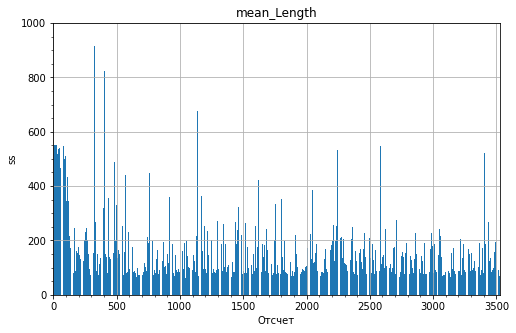

In [6]:
#mean_length
plt.subplot(111)
plt.bar(NUMBER, [x.mean_length for x in array_object_on_Interval])
# plt.bar(NUMBER1, min_length1, color = 'r')
plt.axis([0, len(array_object_on_Interval), 0, 1000])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('mean_Length')
plt.minorticks_on()

plt.grid()
plt.show()



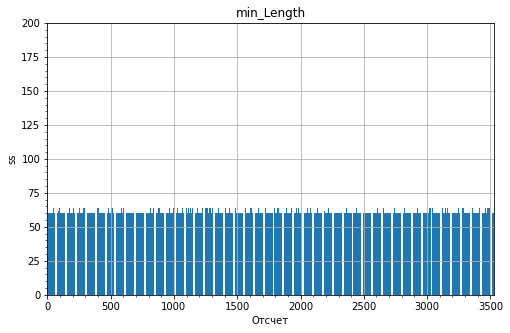

In [7]:
#min_length
plt.subplot(111)
plt.bar(NUMBER, [x.min_length for x in array_object_on_Interval])
# plt.bar(NUMBER1, min_length1, color = 'r')
plt.axis([0, len(array_object_on_Interval), 0, 200])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('min_Length')
plt.minorticks_on()

plt.grid()
plt.show()


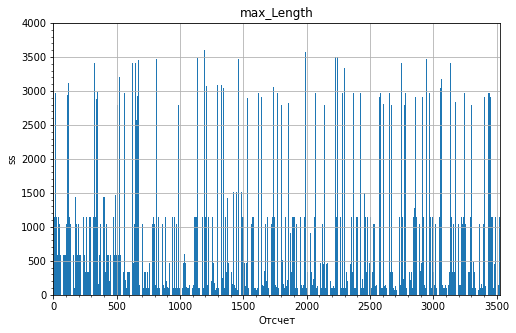

In [8]:
#max_length
plt.subplot(111)
plt.bar(NUMBER, [x.max_length for x in array_object_on_Interval])
plt. axis([0, len(array_object_on_Interval), 0, 4000])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('max_Length')
plt.minorticks_on()
plt.grid()
plt.show()

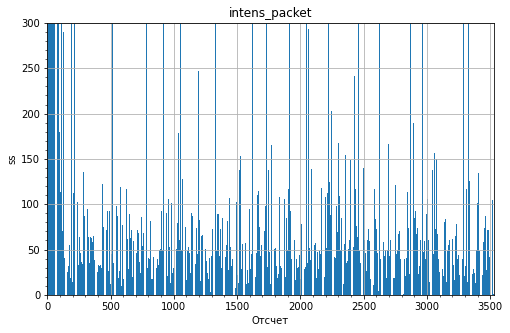

In [9]:
#intens -packet
plt.subplot(111)
plt.bar(NUMBER, [x.intens for x in array_object_on_Interval])
# plt.bar(NUMBER1, intens1, color='r')
plt.axis([0, len(array_object_on_Interval), 0, 300])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('intens_packet')
plt.minorticks_on()
plt.grid()
plt.show()

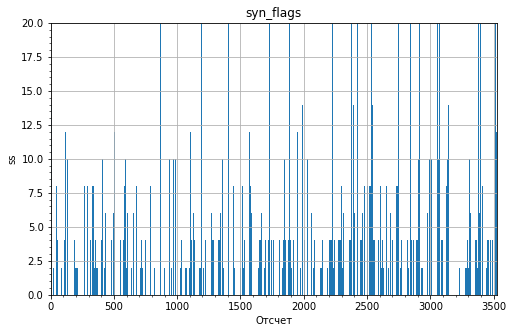

In [10]:
#syn_flags
plt.subplot(111)
plt.bar(NUMBER, [x.syn for x in array_object_on_Interval])
# plt.bar(NUMBER1, syn1, color= 'r')
plt.axis([0, len(array_object_on_Interval), 0, 20])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('syn_flags')
plt.minorticks_on()
plt.grid()
plt.show()

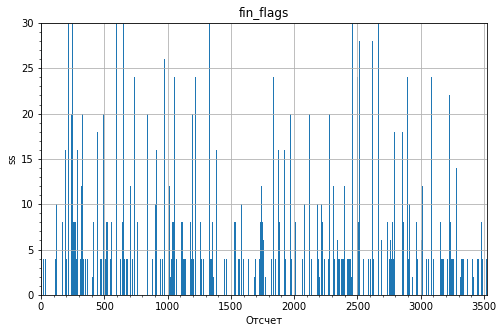

In [11]:
#fin_flags
plt.subplot(111)
plt.bar(NUMBER, [x.fin for x in array_object_on_Interval])
# plt.bar(NUMBER1, syn1, color= 'r')
plt.axis([0, len(array_object_on_Interval), 0, 30])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('fin_flags')
plt.minorticks_on()
plt.grid()
plt.show()

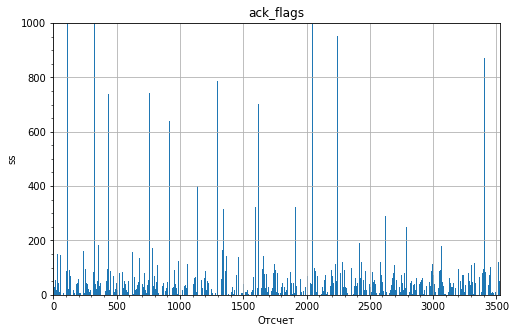

In [12]:
#ack_flags
plt.subplot(111)
plt.bar(NUMBER, [x.ack for x in array_object_on_Interval])
# plt.bar(NUMBER1, syn1, color= 'r')
plt.axis([0, len(array_object_on_Interval), 0, 1000])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('ack_flags')
plt.minorticks_on()
plt.grid()
plt.show()

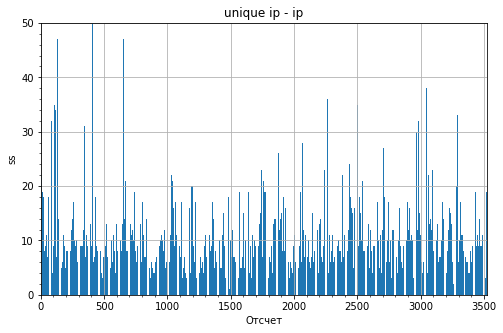

In [13]:
#unique ip-ip
plt.subplot(111)
plt.bar(NUMBER, [x.unique_ip for x in array_object_on_Interval])
# plt.bar(NUMBER1, unique1, color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('unique ip - ip')
plt.minorticks_on()
plt. axis([0, len(array_object_on_Interval), 0, 50])
plt.grid()
plt.show()

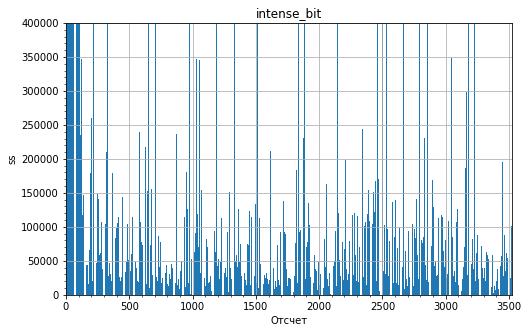

In [14]:
#intens_bit
plt.subplot(111)
plt.bar(NUMBER, [x.intens_bit for x in array_object_on_Interval])
# plt.bar(NUMBER1, bit1, color='r')
plt.axis([0, len(array_object_on_Interval), 0, 400000])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('intense_bit')
plt.minorticks_on()
plt.grid()
plt.show()

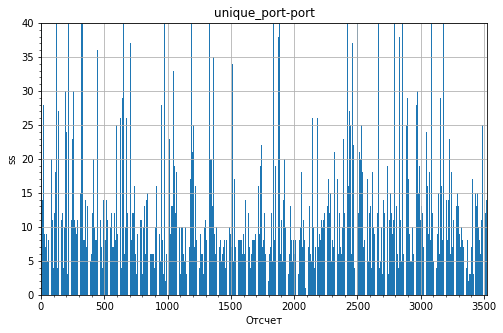

In [15]:
#unique_port
plt.subplot(111)
plt.bar(NUMBER, [x.unique_port for x in array_object_on_Interval])
# plt.bar(NUMBER1, bit1, color='r')
plt.axis([0, len(array_object_on_Interval), 0, 40])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('unique_port-port')
plt.minorticks_on()
plt.grid()
plt.show()

In [16]:
#### коэффициент ассметрии

def koef_assim(a):
    d = np.var(a, ddof=1)
    ka = (sum((xi - np.mean(a)) ** 3 for xi in a) / len(a)) / d ** 3
    if np.isnan(ka) or np.isinf(ka):
        return 0 
    return ka

#### коэффициент эксцесса

def koef_eksces(a):
    d = np.var(a, ddof=1)
    ke = ((sum((xi - np.mean(a)) ** 4 for xi in a) / len(a)) / d ** 4) - 3
    if np.isnan(ke) or np.isinf(ke):
        return 0 
    return ke

#### контрэксцесс

def kontrecsces(a):
    d = np.var(a, ddof=1)
    c = 1 / math.sqrt(scipy.stats.moment(a, moment=4) / (math.sqrt(d) ** 4))
    if np.isnan(c) or np.isinf(c):
        return 0
    return c
#### энтропийный коэффициент

def entr_koef(d, n, y, a):
    # n = len(a) число элементов в списке
    # m = int(10 + np.sqrt(n)) кол интервалов разбиения
    # d =(max(a)-min(a))/m длина интервалов
    h = 0.5 * d * n * 10 ** (-1 * (y * math.log10(y) / n))
    
#     h = 0.5 * d * n * 10 ** (-sum ([w * math.log10 (w) for w in y if w != 0]) / n)
    h = h / a
    if np.isnan(h) or np.isinf(h):
        return 0 
    return h

File vrem_int.csv


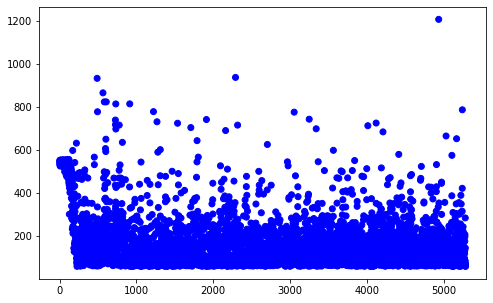

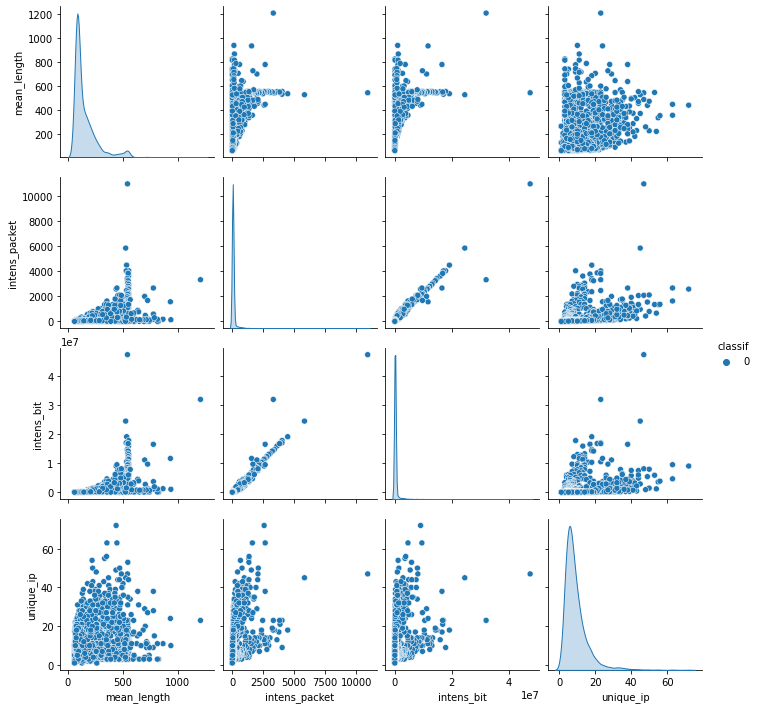

In [17]:
### создание класса для 4-х функций у каждого парамерта
class Default:
    def __init__(self, mean_ln_k_assim, mean_ln_k_eks, mean_ln_kontr, mean_ln_en_k,\
                min_ln_k_assim, min_ln_k_eks, min_ln_kontr, min_ln_en_k,\
                max_ln_k_assim, max_ln_k_eks, max_ln_kontr, max_ln_en_k,\
                intens_bit_k_assim, intens_bit_k_eks, intens_bit_kontr, intens_bit_en_k, \
                intens_p_k_assim, intens_p_k_eks, intens_p_kontr, intens_p_en_k,\
                unique_ip_k_assim, unique_ip_k_eks, unique_ip_kontr, unique_ip_en_k, \
                unique_port_k_assim, unique_port_k_eks, unique_port_kontr, unique_port_en_k, classific):
        self.mean_ln_k_assim = mean_ln_k_assim
        self.mean_ln_k_eks = mean_ln_k_eks
        self.mean_ln_kontr = mean_ln_kontr
        self.mean_ln_en_k = mean_ln_en_k
        
        self.min_ln_k_assim = min_ln_k_assim
        self.min_ln_k_eks = min_ln_k_eks
        self.min_ln_kontr = min_ln_kontr
        self.min_ln_en_k = min_ln_en_k
    
        self.max_ln_k_assim = max_ln_k_assim
        self.max_ln_k_eks = max_ln_k_eks
        self.max_ln_kontr = max_ln_kontr
        self.max_ln_en_k = max_ln_en_k
        
        self.intens_bit_k_assim = intens_bit_k_assim
        self.intens_bit_k_eks = intens_bit_k_eks
        self.intens_bit_kontr = intens_bit_kontr
        self.intens_bit_en_k = intens_bit_en_k
        
        self.intens_p_k_assim = intens_p_k_assim
        self.intens_p_k_eks = intens_p_k_eks
        self.intens_p_kontr = intens_p_kontr
        self.intens_p_en_k = intens_p_en_k
        
        self.unique_ip_k_assim = unique_ip_k_assim
        self.unique_ip_k_eks = unique_ip_k_eks
        self.unique_ip_kontr = unique_ip_kontr
        self.unique_ip_en_k = unique_ip_en_k
        
        self.unique_port_k_assim = unique_port_k_assim
        self.unique_port_k_eks = unique_port_k_eks
        self.unique_port_kontr = unique_port_kontr
        self.unique_port_en_k = unique_port_en_k
        
        self.classific = classific

#создание каждого объекта отдельно



In [18]:
import scipy.stats

def func2(k1, k2, array):
    obj = Default(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
    del obj
    f_mean_length = []
    f_min_len = []
    f_max_len = []
    f_intens_bit = []
    f_intens_p = []
    f_unique_ip = []
    f_unique_port = []
    f_class = []
    itog_cl = []
    for i in range(len(array)):
        if int(k1) <= int(i) <= int(k2):
            f_mean_length.append(array[i].mean_length)
            f_min_len.append(array[i].min_length)
            f_max_len.append(array[i].max_length)
            f_intens_bit.append(array[i].intens_bit)
            f_intens_p.append(array[i].intens)
            f_unique_ip.append(array[i].unique_ip)
            f_unique_port.append(array[i].unique_port) 
            f_class.append(array[i].classification)
    if len(f_mean_length) > 0:
        if len(f_class) == sum(f_class):
            itog_cl = 1
        else:
            itog_cl = 0
        obj = Default(koef_assim(f_mean_length), koef_eksces(f_mean_length), kontrecsces(f_mean_length),\
                      entr_koef(k2 - k1, len(f_mean_length), len(f_mean_length), np.std(f_mean_length)),\
                      koef_assim(f_min_len), koef_eksces(f_min_len), kontrecsces(f_min_len),\
                      entr_koef(k2 - k1, len(f_min_len), len(f_min_len), np.std(f_min_len)), \
                      koef_assim(f_max_len), koef_eksces(f_max_len), kontrecsces(f_max_len), \
                      entr_koef(k2 - k1, len(f_max_len), len(f_max_len), np.std(f_max_len)), \
                      koef_assim(f_intens_bit), koef_eksces(f_intens_bit), kontrecsces(f_intens_bit), \
                      entr_koef(k2 - k1, len(f_intens_bit), len(f_intens_bit), np.std(f_intens_bit)), \
                      koef_assim(f_intens_p), koef_eksces(f_intens_p), kontrecsces(f_intens_p), \
                      entr_koef(k2 - k1, len(f_intens_p), len(f_intens_p), np.std(f_intens_p)), \
                      koef_assim(f_unique_ip), koef_eksces(f_unique_ip), kontrecsces(f_unique_ip), \
                      entr_koef(k2 - k1, len(f_unique_ip), len(f_unique_ip), np.std(f_unique_ip)), \
                      koef_assim(f_unique_port), koef_eksces(f_unique_port), kontrecsces(f_unique_port), \
                      entr_koef(k2 - k1, len(f_unique_port), len(f_unique_port), np.std(f_unique_port)),\
                      itog_cl)            
            
    else:
        k_assim = 0
        k_eks = 0
        kontr = 0
        en_k = 0
    f_mean_length.clear()
    f_min_len.clear()
    f_max_len.clear()
    f_intens_bit.clear()
    f_intens_p.clear()
    f_unique_ip.clear()
    f_unique_port.clear()
    f_class.clear()
    return obj
#     return mean_ln_k_assim, mean_ln_k_eks, mean_ln_kontr, mean_ln_en_k, \
# min_ln_k_assim, min_ln_k_eks, min_ln_kontr, min_ln_en_k,\
# max_ln_k_assim, max_ln_k_eks, max_ln_kontr, max_ln_en_k,\
# intens_bit_k_assim, intens_bit_k_eks, intens_bit_kontr, intens_bit_en_k, \
# intens_p_k_assim, intens_p_k_eks, intens_p_kontr, intens_p_en_k,\
# unique_ip_k_assim, unique_ip_k_eks, unique_ip_kontr, unique_ip_en_k, \
# unique_port_k_assim, unique_port_k_eks, unique_port_kontr, unique_port_en_k, itog_cl


#             mean_ln_k_assim = koef_assim(f_mean_length)
#             mean_ln_k_eks = koef_eksces(f_mean_length)
#             mean_ln_kontr = kontrecsces(f_mean_length)
#             mean_ln_en_k = entr_koef(k2 - k1, len(f_mean_length), len(f_mean_length), np.std(f_mean_length))
            
#             min_ln_k_assim = koef_assim(f_min_len)
#             min_ln_k_eks = koef_eksces(f_min_len)
#             min_ln_kontr = kontrecsces(f_min_len)
#             min_ln_en_k = entr_koef(k2 - k1, len(f_min_len), len(f_min_len), np.std(f_min_len))
            
#             max_ln_k_assim = koef_assim(f_max_len)
#             max_ln_k_eks = koef_eksces(f_max_len)
#             max_ln_kontr = kontrecsces(f_max_len)
#             max_ln_en_k = entr_koef(k2 - k1, len(f_max_len), len(f_max_len), np.std(f_max_len))
            
#             intens_bit_k_assim = koef_assim(f_intens_bit)
#             intens_bit_k_eks = koef_eksces(f_intens_bit)
#             intens_bit_kontr = kontrecsces(f_intens_bit)
#             intens_bit_en_k = entr_koef(k2 - k1, len(f_intens_bit), len(f_intens_bit), np.std(f_intens_bit))
            
#             intens_p_k_assim = koef_assim(f_intens_p)
#             intens_p_k_eks = koef_eksces(f_intens_p)
#             intens_p_kontr = kontrecsces(f_intens_p)
#             intens_p_en_k = entr_koef(k2 - k1, len(f_intens_p), len(f_intens_p), np.std(f_intens_p))
            
#             unique_ip_k_assim = koef_assim(f_unique_ip)
#             unique_ip_k_eks = koef_eksces(f_unique_ip)
#             unique_ip_kontr = kontrecsces(f_unique_ip)
#             unique_ip_en_k = entr_koef(k2 - k1, len(f_unique_ip), len(f_unique_ip), np.std(f_unique_ip))
            
#             unique_port_k_assim = koef_assim(f_unique_port)
#             unique_port_k_eks = koef_eksces(f_unique_port)
#             unique_port_kontr = kontrecsces(f_unique_port)
#             unique_port_en_k = entr_koef(k2 - k1, len(f_unique_port), len(f_unique_port), np.std(f_unique_port))
            
    
    
print(func2(0, 2, array_object_on_Interval).mean_ln_k_assim)      

0.0018926236305394578


c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [19]:
def fff(a1, a2, arr):
    ITOG_MAS = []
    c = len(arr)
    while a2 <= len(arr):
        if 0 <= a2 <= int(0.1*c):
            print(1 * '■' + 9 * '○')
        elif int(0.1*c) < a2 <= int(0.2*c):
            print(2 * '■' + 8 * '○')
        elif int(0.2*c) < a2 <= int(0.3*c):
            print(3 * '■' + 7 * '○')
        elif int(0.3*c) < a2 <= int(0.4*c):
            print(4 * '■' + 6 * '○')
        elif int(0.4*c) < a2 <= int(0.5*c):
            print(5 * '■' + 5 * '○')
        elif int(0.5*c) < a2 <= int(0.6*c):
            print(6 * '■' + 4 * '○')
        elif int(0.6*c) < a2 <= int(0.7*c):
            print(7 * '■' + 3 * '○')
        elif int(0.7*c) < a2 <= int(0.8*c):
            print(8 * '■' + 2 * '○')
        elif int(0.8*c) < a2 <= int(0.9*c):
            print(9 * '■' + 1 * '○')
        else:
            print(9 * '■' + 1 * '○')
#         print(a2)
        ITOG_MAS.append(func2(a1, a2, arr))
        a1, a2 = a1 + step2, a2 + step2
    return ITOG_MAS
    

In [20]:
a1 = 0
a2 = int(input('Введите окно для анализа временного интервала = '))
step2 = int(input('Введите шаг окна = '))

k = fff(a1,a2,array_object_on_Interval)

Введите окно для анализа временного интервала = 5
Введите шаг окна = 2
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○

c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
c:\users\safin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars



■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○○
■○○○○○○○○

■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■○○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○
■■■■■■○○○○

■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○
■■■■■■■■■○

In [129]:
print(k[0].mean_ln_k_assim)
for i in k:
    print(i.mean_ln_k_assim)

# f_mean_length = [x.mean_length for x in array_object_on_Interval]
# f_min_length = [x.min_length for x in array_object_on_Interval]
# f_max_length = [x.max_length for x in array_object_on_Interval]
# f_intens_p = [x.intens for x in array_object_on_Interval]
# f_intens_bit = [x.intens_bit for x in array_object_on_Interval]
# f_unique_ip = [x.unique_ip for x in array_object_on_Interval]
# f_unique_port = [x.unique_port for x in array_object_on_Interval]
# f_class = [x.classification for x in array_object_on_Interval]



-0.00033476807085268493
-0.00033476807085268493
-0.00027524550435926656
-0.0002786735102714284
-0.0015352230961841967
0.00035573660167454417
-0.0046977036654681555
-0.017359132053920135
0.01702123861535282
0.06894647279350138
-0.003972415000737299
-0.002605016884491431
-0.0024909604455804774
-0.007140913082446584
-0.004320810549870853
-0.0008659093484481785
1.885512403614144e-05
0.0008814362772598647
-0.002876218852164567
-0.0012346592038862336
-0.015603031096097201
0.02069036875423021
-0.003490329345534936
-0.00046907150845581884
-0.0005981214855209668
-0.00041136035173186666
-0.0006445128246148284
-0.0021322838728221045
-0.00017617231160785136
-0.0001767360867419833
-0.001036900296954945
-0.00019468707655391287
-6.297904079673546e-05
-3.0153727724144387e-05
-1.231026860973055e-05
-0.000393690428281738
-0.001593159654510491
-0.001146218707241629
3.7022994776102074e-05
0.0009999086410089103
0.0010661795149498792
-6.390862834237515e-05
-2.368762015717633e-05
-2.175384415621817e-05
-2.38

1.5315759346155993e-05
2.550741049496702e-05
6.867510822257848e-06
5.67557525319679e-07
-1.9591658207420423e-06
-9.910663431536543e-08
1.4790961400533386e-06
4.59022797431045e-06
1.4217567379136148e-06
2.563107325522287e-06
8.433546028922409e-05
7.986367483608209e-07
9.32854853524831e-07
8.554372366148816e-07
7.86687146402667e-05
-7.999818442781252e-05
2.8560399073909403e-06
3.2175061994489845e-06
2.759284728984597e-06
2.449813285999717e-06
2.5911788704546658e-06
2.64365779921568e-06
4.047308774715505e-05
3.21875272310581e-05
7.573185166166935e-05
1.8753843557012592e-06
1.8097027510495471e-06
1.7990368981107306e-06
5.910189886636623e-06
2.7338455944393733e-05
7.781566393587835e-05
8.378735287027833e-05
2.796198348867715e-05
1.284023326202843e-05
1.9856563450341814e-06
1.732228021263144e-06
1.2732351434329127e-06
5.056040016143128e-06
3.842146073684228e-05
2.9763419702722806e-06
3.092166284080388e-06
2.8038504742135727e-06
3.6849354341195314e-05
1.8717402763350022e-05
8.40733925728881e-

3.0965398234107966e-06
4.428760085965373e-06
4.544682750568208e-06
2.68433255457529e-05
0.00026512857783997324
2.369885681636482e-05
2.0234594378678315e-05
3.166456939518732e-05
5.004923291639481e-07
5.523498033075475e-07
5.074962119745096e-07
-0.0001230679920872682
9.54519068059404e-06
3.6595584646753484e-06
2.0189034574473855e-07
4.385567344278479e-06
2.040436485689813e-05
8.861445894793727e-07
7.721551478151972e-07
7.507956625057211e-07
-4.5231541216126556e-05
-0.00031584935435112146
6.466394898566805e-06
6.731327154805234e-06
7.270556034133435e-08
1.9992770268110153e-08
3.641986802696891e-08
6.269224098178574e-07
-2.2776385880230603e-06
-3.5113150327049915e-05
2.0143921374496366e-05
7.011236105392993e-06
1.6829323669102484e-06
1.3619947089841863e-06
3.327909572425926e-06
3.2371592280467274e-07
3.7285710831233277e-07
4.1871536225341234e-07
3.3527748638424533e-06
2.096522061021438e-06
2.5019449598295246e-06
7.582750821723231e-06
3.805498646472577e-07
2.0048499297587572e-07
1.61109761

ГРАФИКИ ДЛЯ СРЕДНЕЙ ДЛИНЫ ПАКЕТА


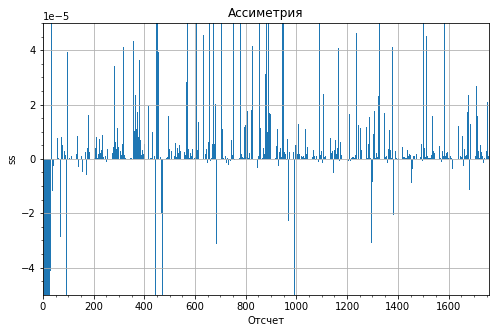

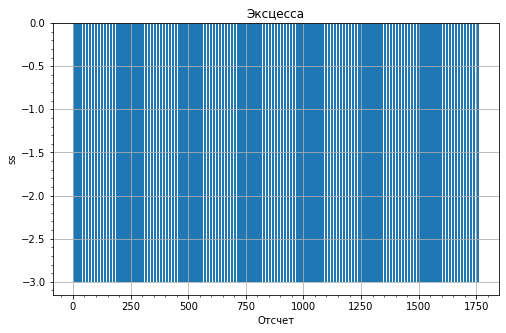

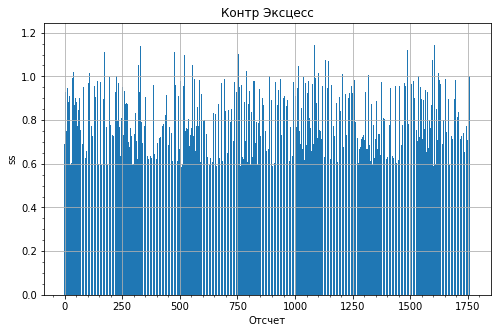

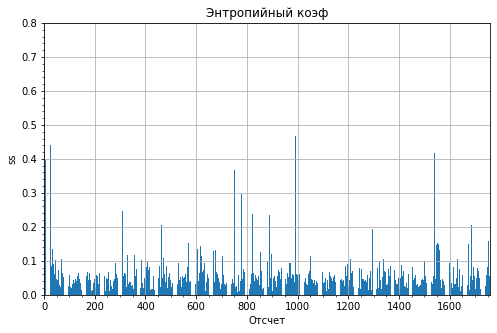

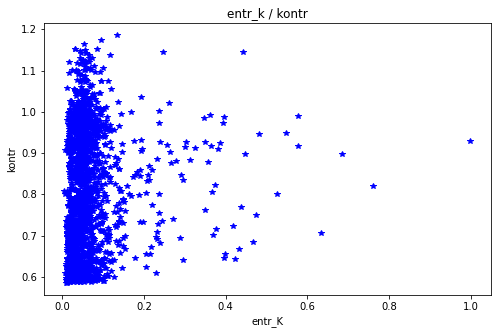

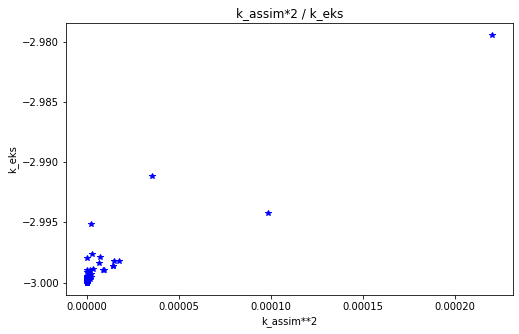

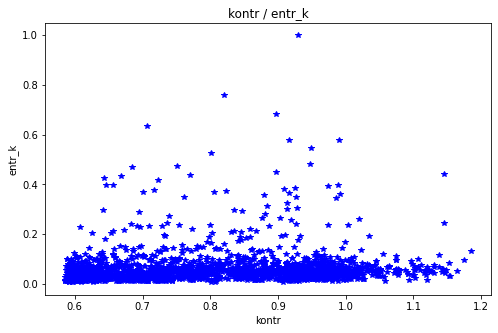

'3DPlot.html'

In [21]:
print ('ГРАФИКИ ДЛЯ СРЕДНЕЙ ДЛИНЫ ПАКЕТА')

#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)), [c.mean_ln_k_assim for c in k])
# plt.bar(fff(a1, a2, mean_length)[13], fff(a1, a2, mean_length)[8], color='r')
plt.axis([0, len(range(len(k))), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
# #
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.mean_ln_k_eks for c in k])
# plt.bar(fff(a1, a2, mean_length)[13], fff(a1, a2, mean_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
# #контрэксцесс
# #
plt.subplot(111)
plt.bar(range(len(k)), [c.mean_ln_kontr for c in k])
# plt.bar(fff(a1, a2, mean_length)[13], fff(a1, a2, mean_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
# #
# #энтропийный коэф
# #
plt.subplot(111)
plt.bar(range(len(k)), [c.mean_ln_en_k for c in k])
# plt.bar(fff(a1, a2, mean_length)[13], fff(a1, a2, mean_length)[11], color='r')
plt.axis([0, len(range(len(k))), 0, 0.8])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
# #
# #энтр коэф \ контр
# #
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.mean_ln_en_k for c in k], [c.mean_ln_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, mean_length)[11], fff(a1, a2, mean_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
# #
# #ассим \ экс
# #
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot( [c.mean_ln_k_assim**2 for c in k], [c.mean_ln_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, mean_length)[8]], fff(a1, a2, mean_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
# #
# #kont/entr
# #

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.mean_ln_kontr for c in k], [c.mean_ln_en_k for c in k] , 'b*')
# plt.plot(fff(a1, a2, mean_length)[10], fff(a1, a2, mean_length)[11], 'r^')
plt.show()
# #
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.mean_ln_en_k for c in k], y=[c.mean_ln_k_assim for c in k],\
                    z=[c.mean_ln_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5),\
                    line=dict(width=0.2), mode='markers')
# fig2 = go.Scatter3d(x=fff(a1, a2, mean_length)[11], y=fff(a1, a2, mean_length)[8], z=fff(a1, a2, mean_length)[10], marker=dict(opacity=0.9, reversescale=True,size=5), line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))


ГРАФИКИ ДЛЯ МАКСИМАЛЬНОЙ ДЛИНЫ ПАКЕТА


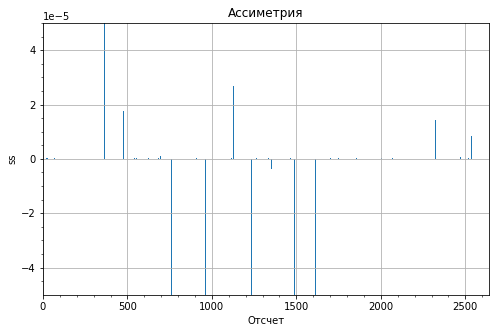

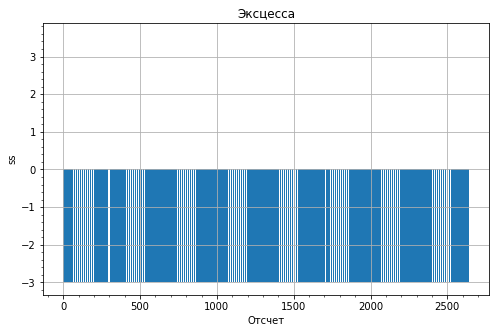

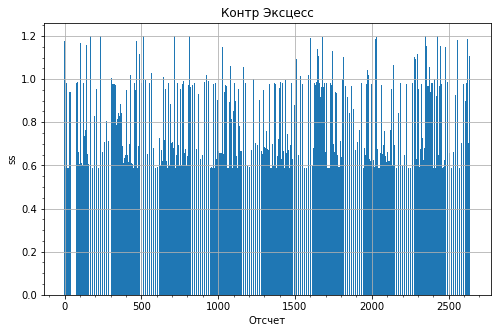

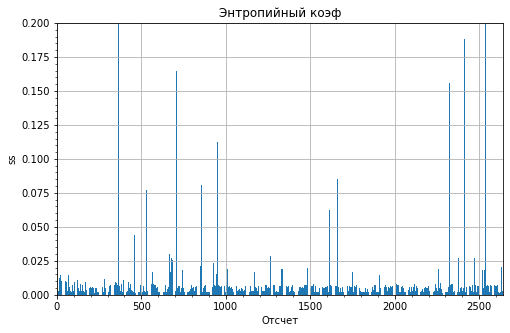

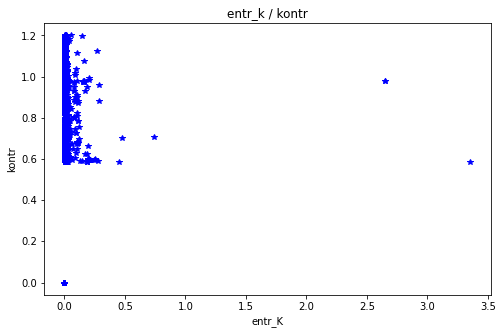

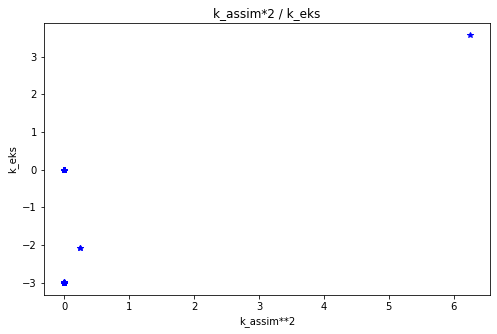

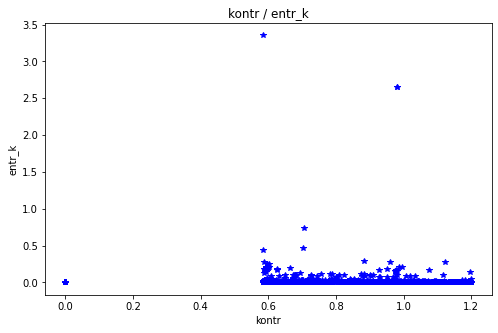

'./html/3DPlot_max_ln.html'

In [143]:
print ('ГРАФИКИ ДЛЯ МАКСИМАЛЬНОЙ ДЛИНЫ ПАКЕТА')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.max_ln_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.max_ln_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.max_ln_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.max_ln_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.max_ln_en_k for c in k], [c.max_ln_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.max_ln_k_assim**2 for c in k],  [c.max_ln_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.max_ln_kontr for c in k], [c.max_ln_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.max_ln_kontr for c in k], y=[c.max_ln_k_assim for c in k],\
                    z=[c.max_ln_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_max_ln.html"))




ГРАФИКИ ДЛЯ МИНИМАЛЬНОЙ ДЛИНЫ ПАКЕТА


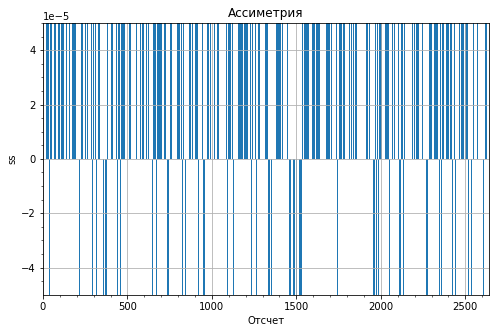

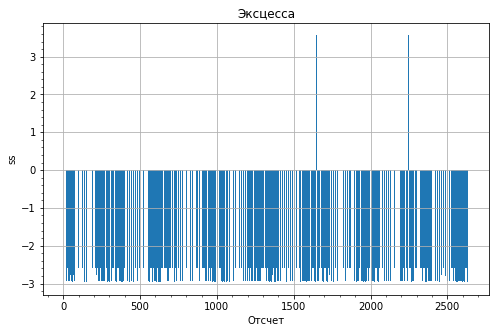

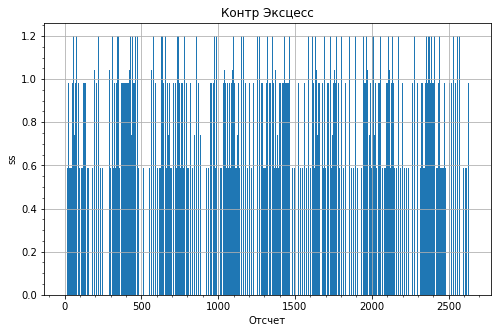

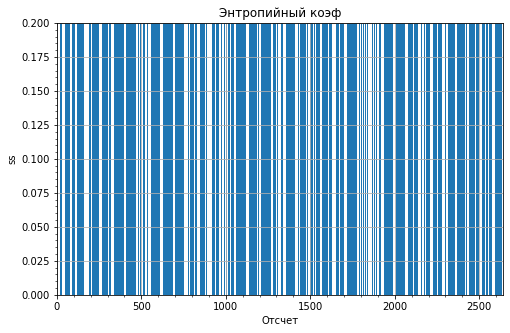

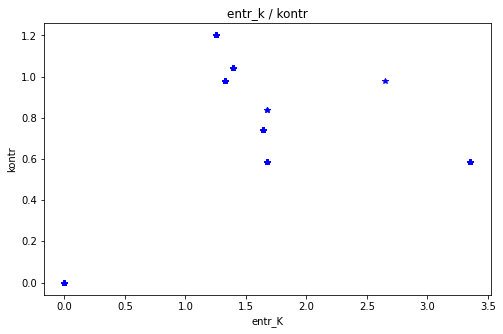

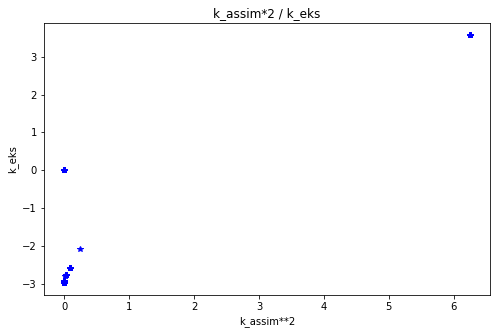

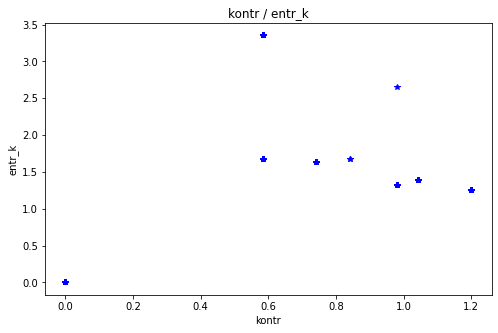

'./html/3DPlot_min_ln.html'

In [144]:
print ('ГРАФИКИ ДЛЯ МИНИМАЛЬНОЙ ДЛИНЫ ПАКЕТА')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.min_ln_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.min_ln_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.min_ln_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.min_ln_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.min_ln_en_k for c in k], [c.min_ln_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.min_ln_k_assim**2 for c in k],  [c.min_ln_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.min_ln_kontr for c in k], [c.min_ln_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.min_ln_kontr for c in k], y=[c.min_ln_k_assim for c in k],\
                    z=[c.min_ln_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_min_ln.html"))




ГРАФИКИ ДЛЯ УНИКАЛЬНЫХ АДРЕСОВ АЙПИ ПАКЕТА


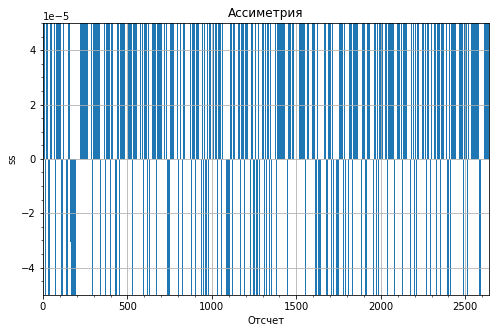

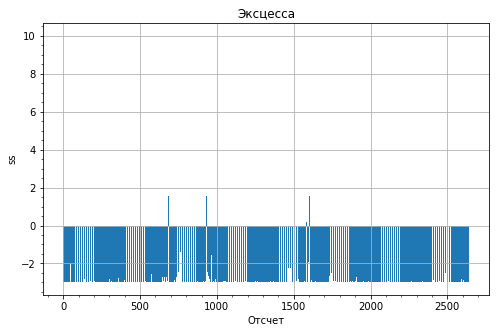

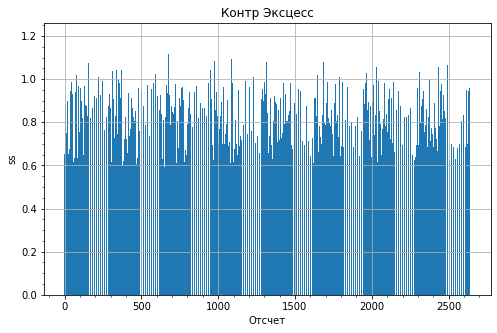

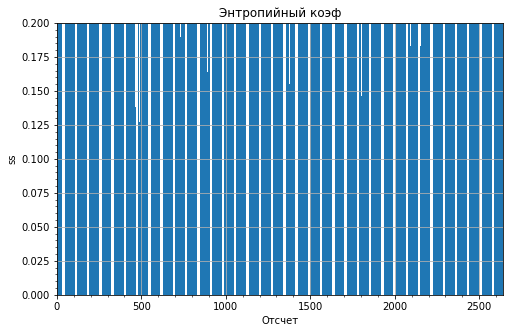

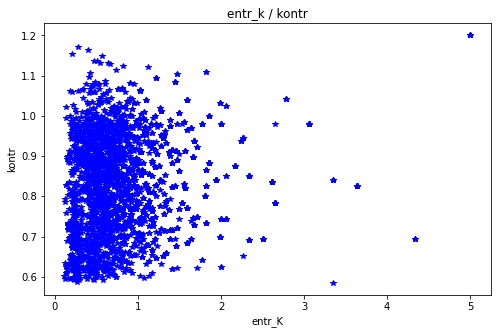

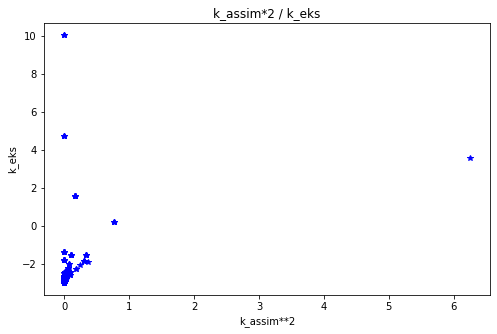

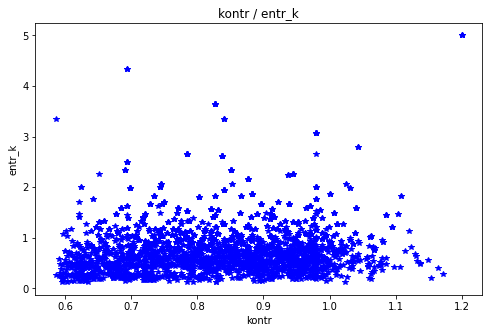

'./html/3DPlot_unique_ip.html'

In [147]:
print ('ГРАФИКИ ДЛЯ УНИКАЛЬНЫХ АДРЕСОВ АЙПИ ПАКЕТА')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.unique_ip_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_ip_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_ip_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_ip_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.unique_ip_en_k for c in k], [c.unique_ip_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.unique_ip_k_assim**2 for c in k],  [c.unique_ip_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.unique_ip_kontr for c in k], [c.unique_ip_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.unique_ip_kontr for c in k], y=[c.unique_ip_k_assim for c in k],\
                    z=[c.unique_ip_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_unique_ip.html"))




ГРАФИКИ ДЛЯ УНИКАЛЬНЫХ ПОРТОВ АЙПИ ПАКЕТА


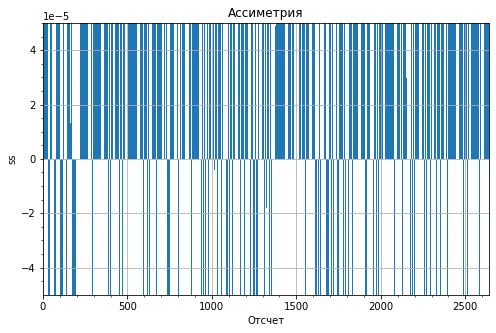

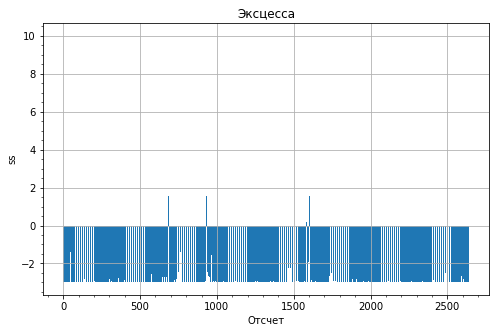

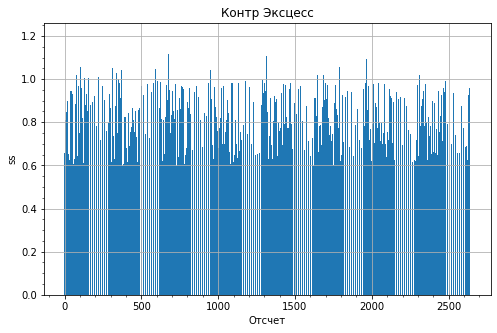

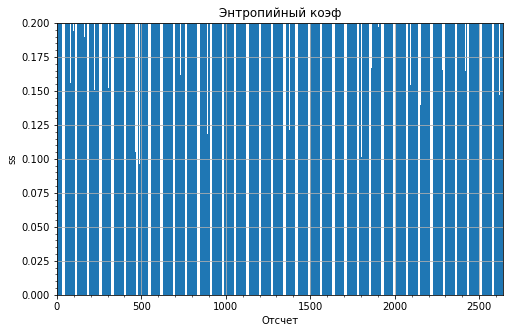

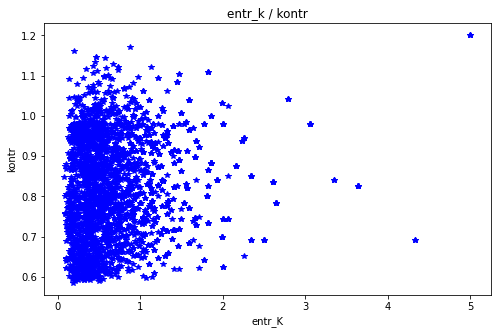

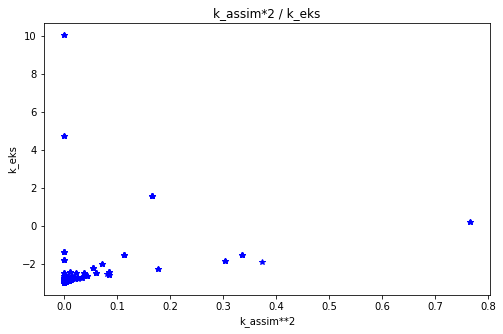

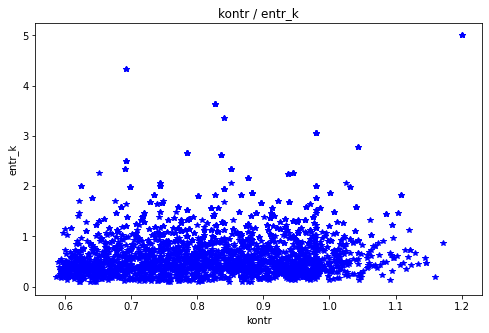

'./html/3DPlot_unique_port.html'

In [149]:
print ('ГРАФИКИ ДЛЯ УНИКАЛЬНЫХ ПОРТОВ АЙПИ ПАКЕТА')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.unique_port_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_port_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_port_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.unique_port_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.unique_port_en_k for c in k], [c.unique_port_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.unique_port_k_assim**2 for c in k],  [c.unique_port_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.unique_port_kontr for c in k], [c.unique_port_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.unique_port_kontr for c in k], y=[c.unique_port_k_assim for c in k],\
                    z=[c.unique_port_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_unique_port.html"))




ГРАФИКИ ДЛЯ ИНТЕНСИВНОСТИ ПАКЕТ


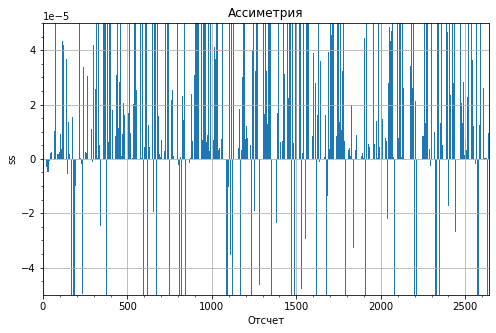

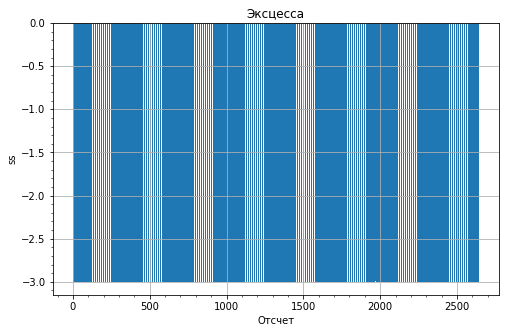

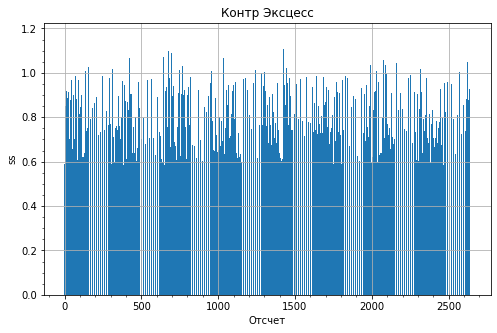

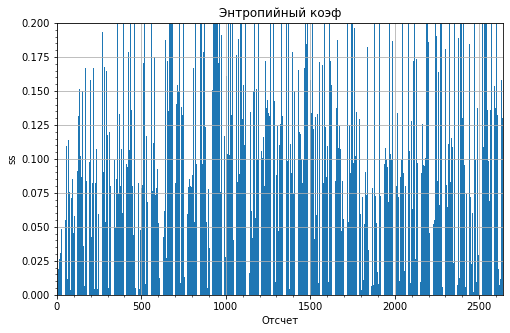

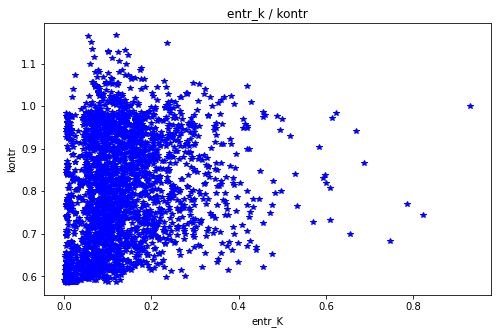

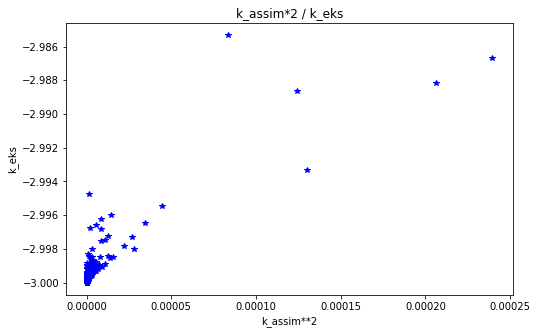

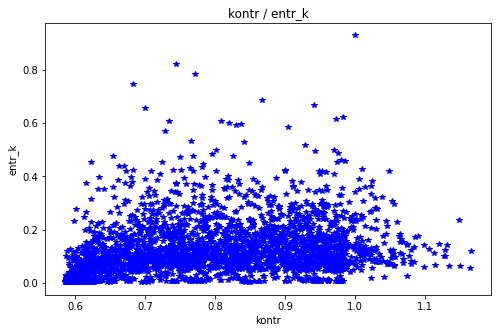

'./html/3DPlot_intens_p.html'

In [150]:
print ('ГРАФИКИ ДЛЯ ИНТЕНСИВНОСТИ ПАКЕТ')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.intens_p_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_p_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_p_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_p_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.intens_p_en_k for c in k], [c.intens_p_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.intens_p_k_assim**2 for c in k],  [c.intens_p_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.intens_p_kontr for c in k], [c.intens_p_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.intens_p_kontr for c in k], y=[c.intens_p_k_assim for c in k],\
                    z=[c.intens_p_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_intens_p.html"))




ГРАФИКИ ДЛЯ ИНТЕНСИВНОСТИ БИТ


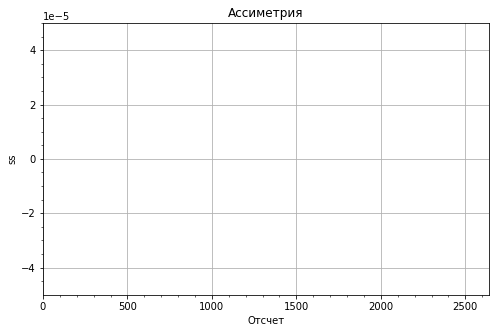

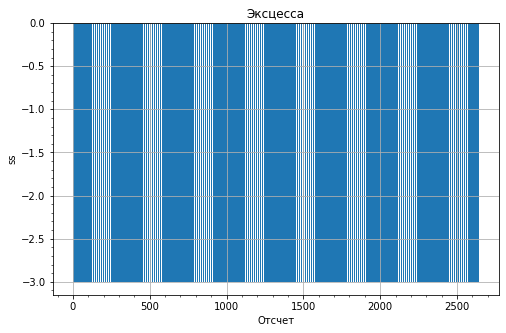

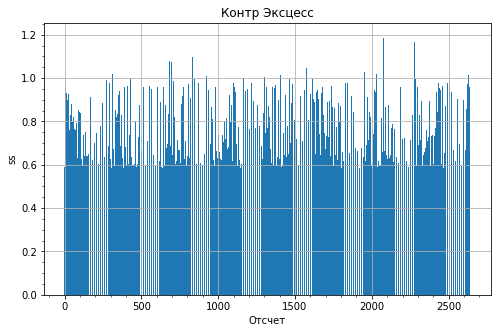

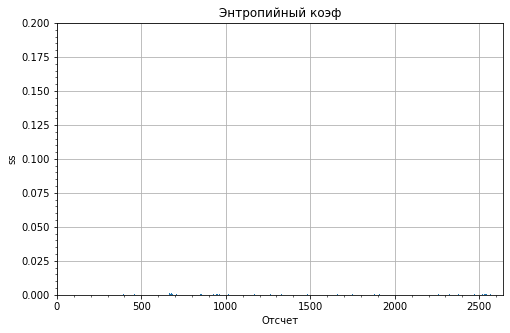

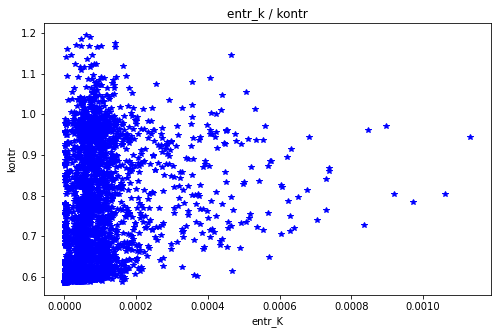

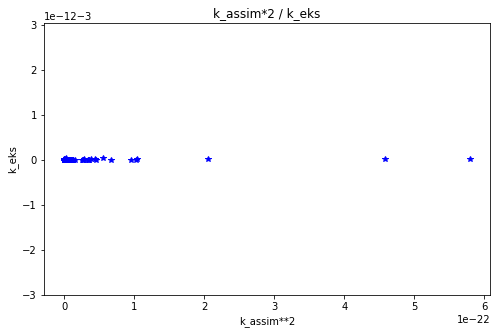

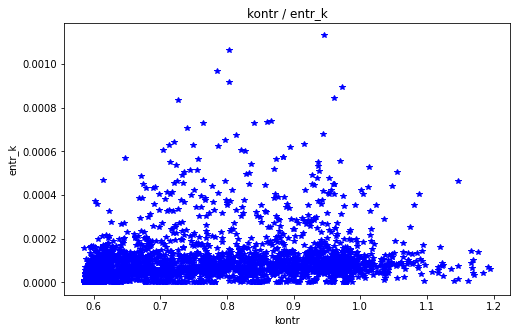

'./html/3DPlot_intens_bit.html'

In [152]:
print ('ГРАФИКИ ДЛЯ ИНТЕНСИВНОСТИ БИТ')
# a1 = 0
# a2 = int(input('Введите окно для анализа временного интервала = '))
# step2 = int(input('Введите шаг окна = '))
#ассиметрия
plt.subplot(111)
plt.bar(range(len(k)),[c.intens_bit_k_assim for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[8], color='r')
plt.axis([0, len(k), -0.00005, 0.00005])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Ассиметрия')
plt.minorticks_on()
plt.grid()
plt.show()
#
#эксцесс
# print(k_ek_ln)
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_bit_k_eks for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[9], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Эксцесса')
plt.minorticks_on()
plt.grid()
plt.show()
#
#контрэксцесс
#
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_bit_kontr for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[10], color='r')
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Контр Эксцесс')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтропийный коэф
#
plt.subplot(111)
plt.bar(range(len(k)), [c.intens_bit_en_k for c in k])
# plt.bar(fff(a1, a2, max_length)[13], fff(a1, a2, max_length)[11], color='r')
plt.axis([0, len(k), 0, 0.2])
plt.xlabel('Отсчет')
plt.ylabel('ss')
plt.title('Энтропийный коэф')
plt.minorticks_on()
plt.grid()
plt.show()
#
#энтр коэф \ контр
#
plt.subplot(111)
plt.title('entr_k / kontr')
plt.plot([c.intens_bit_en_k for c in k], [c.intens_bit_kontr for c in k] , 'b*')
# plt.plot(fff(a1, a2, max_length)[11], fff(a1, a2, max_length)[10], 'r^')
plt.xlabel('entr_K')
plt.ylabel('kontr')
plt.show()
#
#ассим \ экс
#
plt.subplot(111)
plt.title('k_assim*2 / k_eks')
plt.plot([c.intens_bit_k_assim**2 for c in k],  [c.intens_bit_k_eks for c in k], 'b*')
# plt.plot([k**2 for k in fff(a1, a2, max_length)[8]], fff(a1, a2, max_length)[9], 'r^')
plt.xlabel('k_assim**2')
plt.ylabel('k_eks')
plt.show()
#
#kont/entr
#

plt.subplot(111)
plt.title('kontr / entr_k')
plt.xlabel('kontr')
plt.ylabel('entr_k')
plt.plot([c.intens_bit_kontr for c in k], [c.intens_bit_en_k for c in k], 'b*')
# plt.plot(fff(a1, a2, max_length)[10], fff(a1, a2, max_length)[11], 'r^')
plt.show()
#
import plotly.graph_objs as go
import plotly
fig1 = go.Scatter3d(x=[c.intens_bit_kontr for c in k], y=[c.intens_bit_k_assim for c in k],\
                    z=[c.intens_bit_kontr for c in k],\
                    marker=dict(opacity=0.9, reversescale=True,size=5), \
                    line=dict(width=0.2), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
                                yaxis=dict( title="k_assim"),
                                zaxis=dict(title="kontr")),)
#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("./html/3DPlot_intens_bit.html"))




In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash.dependencies
import base64
import seaborn as sns

# code and plot setup
# settings
pd.options.plotting.backend = "plotly"


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

available_indicators = df['Indicator Name'].unique()

image_filename = './assets/1.jpg' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())
children = [
    html.H1("Сайт, посвященный визуализации данных"),
    html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode())),
    html.H2("Created by SafIN"),
    html.Div([
    dcc.Markdown("To get these **features** you should:"),
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=True
    )
])
    ]

app.layout = html.Div([
    html.Div([
     dcc.Tabs(id="tabs", value='tab-1', children=[
        dcc.Tab(label='Вкладка 1', value='tab-1'),
        dcc.Tab(label='Вкладка 2', value='tab-2'),
        dcc.Tab(label='Вкладка 3', value='tab-3'),
        dcc.Tab(label='Вкладка 4', value='tab-4'),
        dcc.Tab(label='Вкладка 5', value='tab-5'),

    ]),
    html.Div(id='tabs-content'),
    html.Div(id='page-1-content'),
    html.Br(),
    dcc.Link('Go to Page 2', href='/page-2'),
    html.Br(),
    dcc.Link('Go back to home', href='/')])
])

@app.callback(Output('tabs-content', 'children'),
              [Input('tabs', 'value')])
def render_content(tab):
    if tab == 'tab-1':
        #mean_length
        plt.subplot(111)
        plt.bar(NUMBER, [x.mean_length for x in array_object_on_Interval])
        # plt.bar(NUMBER1, min_length1, color = 'r')
        plt.axis([0, len(array_object_on_Interval), 0, 1000])
        plt.xlabel('Отсчет')
        plt.ylabel('ss')
        plt.title('mean_Length')
        plt.minorticks_on()
        plt.grid()
        fig1 = plt.show()
        return fig1
    elif tab == 'tab-2':
        return html.Div([
                html.Div(id='jjj'),
                html.H1('JOPA'),
                dcc.Input(id='inp1', type = 'number'),
                dcc.Input(id='inp2', type = 'number'),
                html.Button('Submit', id='submit-val')])
    elif tab == 'tab-3':
        fig1 = px.bar(dfff1, x=fff(a1, a2, min_length)[12], y= fff(a1, a2, min_length)[4], barmode="group")
        fig2 = px.bar(dfff2, x=fff(a1, a2, min_length)[13], y= fff(a1, a2, min_length)[8], barmode="group")
        return fig1
    
# @app.callback(Output('JOPA', 'children'),
#               [Input('inp1', 'value'),
#               Input('inp2', 'value'),
#               Input('submit_val', 'value')])
# def graph(submit_val,inp1, inp2):
#     a1 = 0
#     a2 = inp1
#     step = inp2
#     fig1 = go.Scatter3d(x=fff(a1, a2, intens)[7], y=fff(a1, a2, intens)[4], z=fff(a1, a2, intens)[6], marker=dict(opacity=0.9, reversescale=True,size=5), line=dict(width=0.2), mode='markers')
#     fig2 = go.Scatter3d(x=fff(a1, a2, intens)[11], y=fff(a1, a2, intens)[8], z=fff(a1, a2, intens)[10], marker=dict(opacity=0.9, reversescale=True,size=5), line=dict(width=0.2), mode='markers')
#     mylayout = go.Layout(scene=dict(xaxis=dict( title="entr_k"),
#                                 yaxis=dict( title="k_assim"),
#                                 zaxis=dict(title="kontr")),)
#     return [fig1,fig2]


app.run_server(mode='jupyterlab', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)
